# **Data Visualization**


## Objectives


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-05-26 01:48:26--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  22.1MB/s    in 1.6s    

2024-05-26 01:48:28 (22.1 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [ ]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [ ]:
import pandas as pd

## Demo: How to run an sql query


In [ ]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [ ]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [ ]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [ ]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

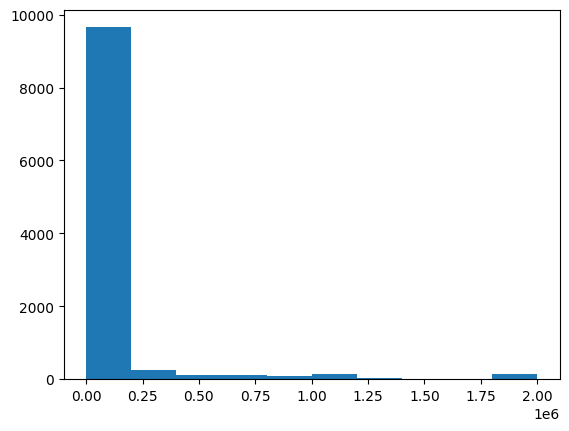

In [ ]:
# your code goes here
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
Q1 = "select ConvertedComp from master "
df = pd.read_sql_query(Q1,conn)
plt.hist(x = df)

### Box Plots


Plot a box plot of `Age.`


<Axes: >

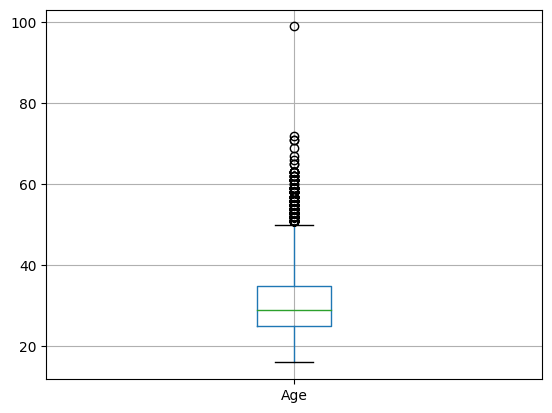

In [ ]:
# your code goes here
Q2 = " select Age from master "
df2 = pd.read_sql_query(Q2,conn)
df2.boxplot(column = 'Age')

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<Axes: xlabel='Age', ylabel='WorkWeekHrs'>

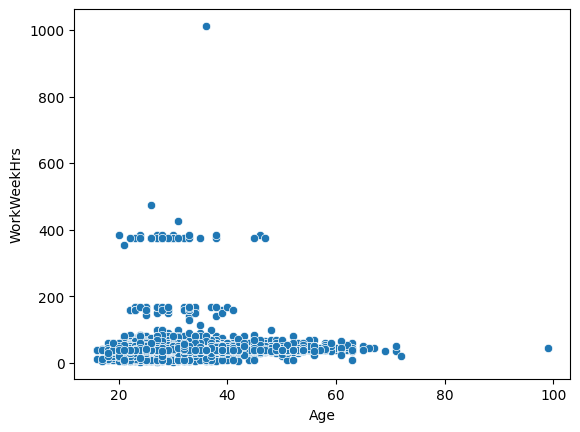

In [ ]:
# your code goes here
Q3 = " select Age, WorkWeekHrs from master "
df3 = pd.read_sql_query(Q3,conn)
sns.scatterplot(data = df3, x='Age',y='WorkWeekHrs')


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<Axes: xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

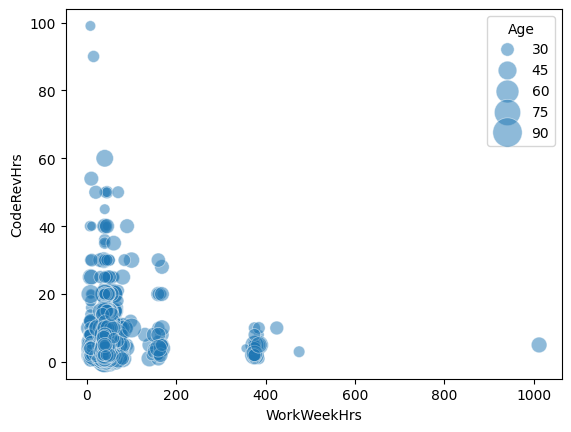

In [ ]:
# your code goes here
Q4 = " select Age, WorkWeekHrs, CodeRevHrs from master "
df4 = pd.read_sql_query(Q4,conn)
sns.scatterplot(data = df4, y='CodeRevHrs',x='WorkWeekHrs', size = 'Age', alpha=0.5, sizes=(10,500))

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


,count
DatabaseDesireNextYear,
PostgreSQL,4328
MongoDB,3649
Redis,3331
MySQL,3281
Elasticsearch,2856


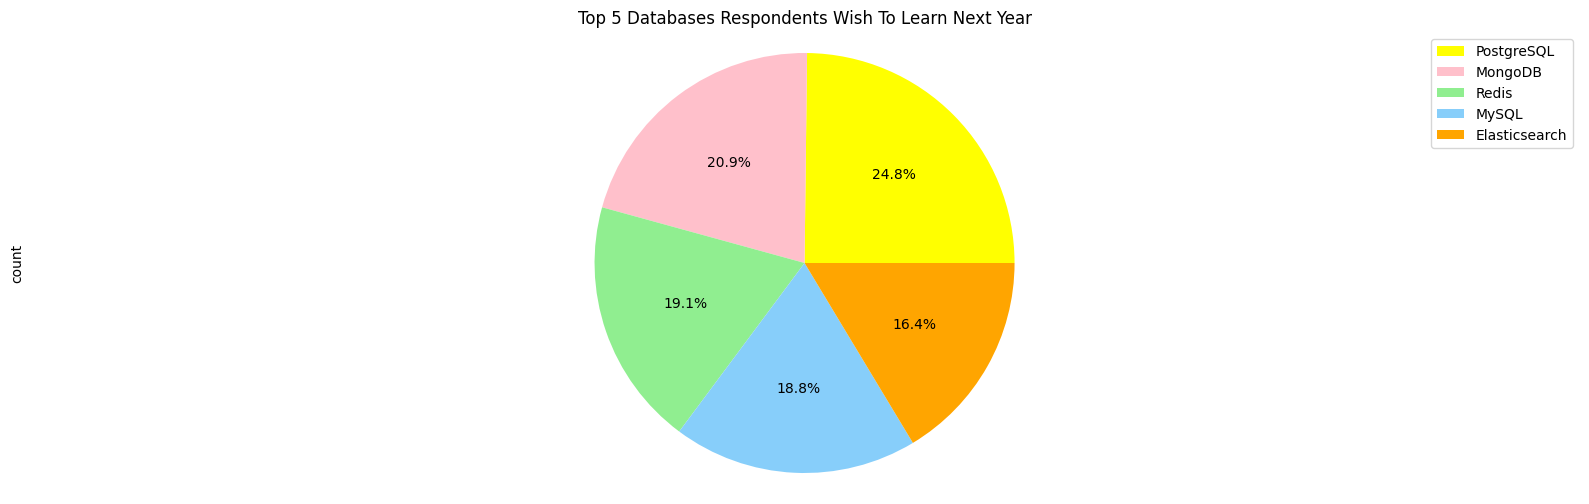

In [ ]:
# your code goes here
Q5="""
SELECT DatabaseDesireNextYear, Count(*) as count
From DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by count DESC limit 5"""

df5 = pd.read_sql_query(Q5,conn)
df5.set_index('DatabaseDesireNextYear', inplace=True)

color_list = ['Yellow', 'pink', 'lightgreen', 'lightskyblue', 'orange' ]
df5['count'].plot(kind='pie', figsize=(20,6), autopct='%1.1f%%', labels=None, colors=color_list)

plt.title('Top 5 Databases Respondents Wish To Learn Next Year')
plt.legend(labels=df5.index, loc='upper right')
plt.axis('equal')
df5

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'Stacked Chart of Median WorkWeekHrs and CodeRecHrs')

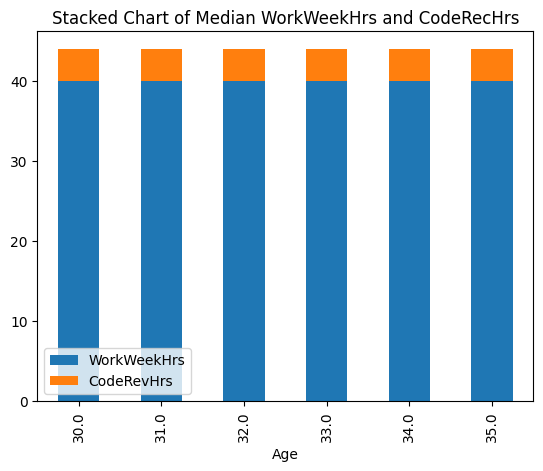

In [ ]:
# your code goes here
Q6 = """
select WorkWeekHrs, CodeRevHrs, Age
from master
where age between 30 and 35 """

df6 = pd.read_sql_query(Q6, conn)
df6_median = df6.groupby('Age').median()

df6_median.plot(kind='bar', stacked=True)

plt.title('Stacked Chart of Median WorkWeekHrs and CodeRecHrs')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0.5, 1.0, 'Median ConvertedComp for ages from 45 to 60')

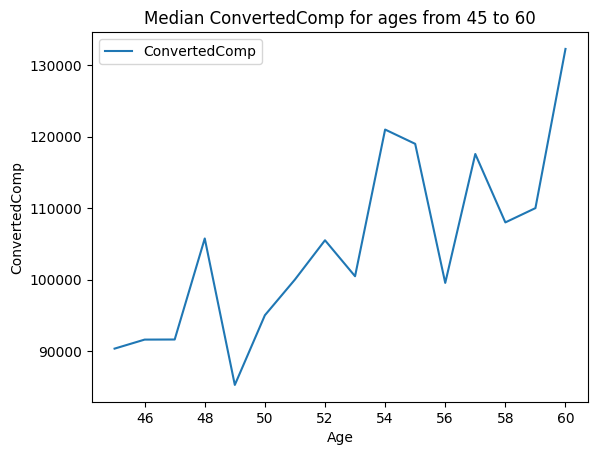

In [ ]:
# your code goes here
Q7 = """
select ConvertedComp, Age
from master
where Age between 45 and 60
"""

df7 = pd.read_sql_query(Q7,conn)

df7_median = df7.groupby('Age').median()

df7_median.plot(kind = 'line')

plt.ylabel('ConvertedComp')
plt.title('Median ConvertedComp for ages from 45 to 60')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<Axes: >

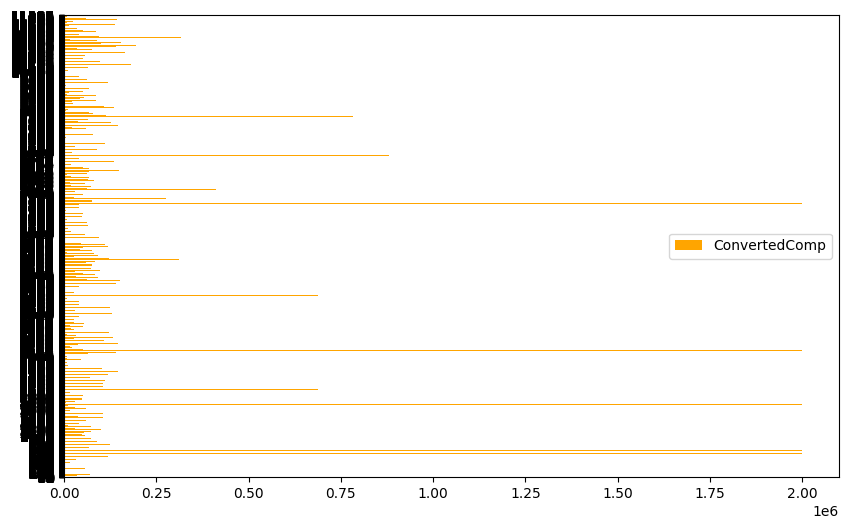

In [ ]:
# your code goes here
Q8 = """
select MainBranch, COUNT(*)
from master
group by MainBranch
"""
df8 = pd.read_sql_query(Q8,conn)

df.plot(kind='barh', figsize=(10,6), color='Orange')

Close the database connection.


In [ ]:
conn.close()

 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
